In [14]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg

### Load data

In [67]:
train = pd.read_csv('datasets/train.csv',index_col='date',parse_dates=True)

In [68]:
train

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.000,0
2013-01-01,1,1,BABY CARE,0.000,0
2013-01-01,2,1,BEAUTY,0.000,0
2013-01-01,3,1,BEVERAGES,0.000,0
2013-01-01,4,1,BOOKS,0.000,0
...,...,...,...,...,...
2017-08-15,3000883,9,POULTRY,438.133,0
2017-08-15,3000884,9,PREPARED FOODS,154.553,1
2017-08-15,3000885,9,PRODUCE,2419.729,148


In [69]:
def get_store_and_family(df,store_nbr,family):
    """
    This function returns the DataFrame that only contains the sales of the given store and family
    params: df, DataFrame
    stor_nbr, int
    family, str
    return: DataFrame
    """
    ret = df.loc[(df['store_nbr']==store_nbr) & (df['family']==family)]
    return ret['sales']

### Plot data

<AxesSubplot:title={'center':'Store_2 and family=SEAFOOD'}, xlabel='date', ylabel='sales'>

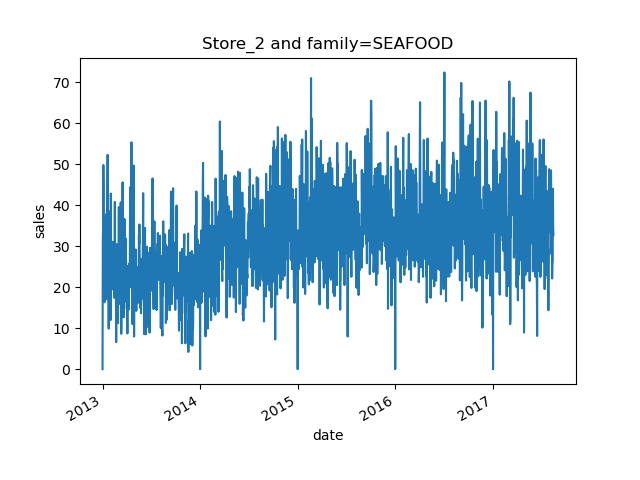

In [72]:
store_nbr = 2
family = 'SEAFOOD'
df = get_store_and_family(train,store_nbr,family)
plt.figure()
df.plot(ylabel='sales',title='Store_%s and family=%s'%(store_nbr,family))

### Check Autocorrelation

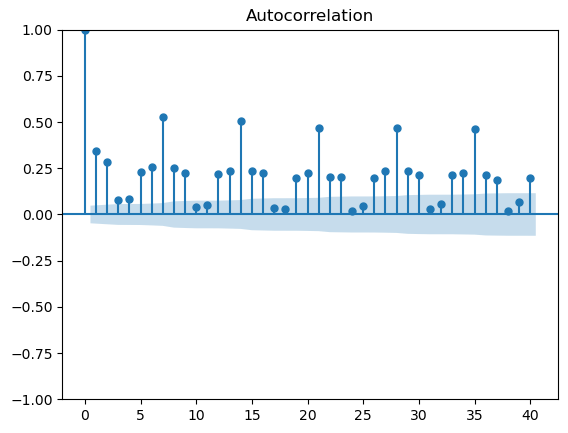

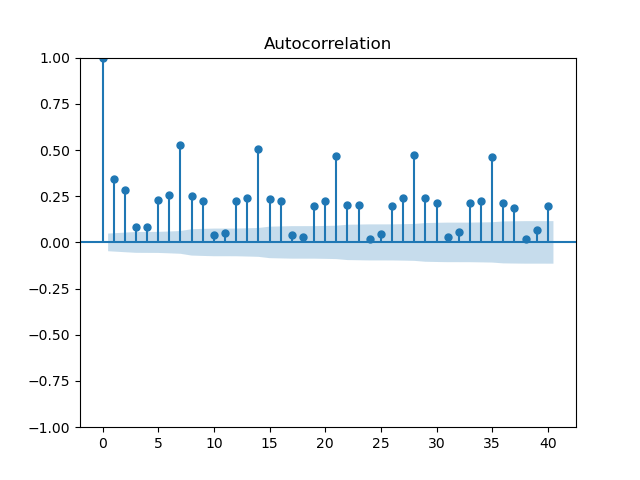

In [73]:
plot_acf(df, lags=40)

### Train AutoReg model

In [58]:
X = df.values
train, test = X[0:len(X)-30], X[len(X)-30:]
model = AutoReg(train, lags = 300, trend='t')
model_fit = model.fit()

In [59]:
# make prediction on the testset
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1,dynamic=False)
rmse = np.sqrt(mean_squared_error(test,predictions))
print('RMSE-value: %s'%rmse)

RMSE-value: 8.727221563096913


In [60]:
df_plot = pd.DataFrame({'sales_pred':np.round(predictions,0),'sales_truth':test},index = df.index[-30:])

<AxesSubplot:title={'center':'AutoReg prediction'}, xlabel='date', ylabel='sales'>

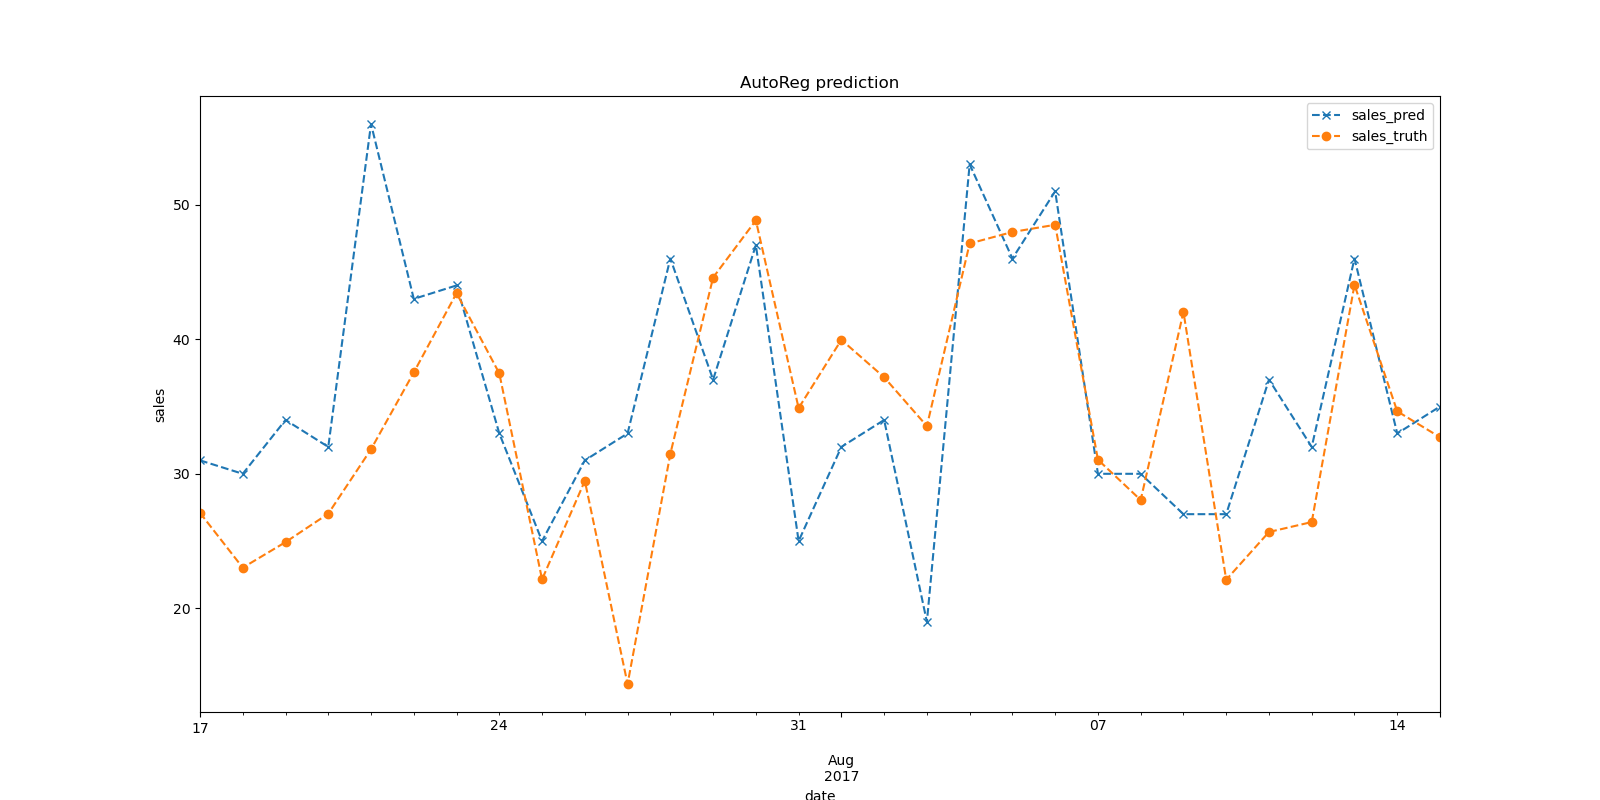

In [61]:
df_plot.plot(style=['x--','o--'],title='AutoReg prediction',ylabel='sales',figsize=(16,8))

### Predict values in future

In [74]:
# train on whole dataset
test = pd.read_csv('datasets/test.csv',index_col='date',parse_dates=True)
test = test.loc[(test['store_nbr']==store_nbr) & (test['family']==family)]
train = df.values
model = AutoReg(train, lags = 300, trend='t')
model_fit = model.fit()

# predict from 2017-08-16 to 2017-08-31
predictions = model_fit.predict(start=len(train),end=len(train)+15,dynamic=False) 
predictions = np.round(predictions,0)
df_pred = pd.DataFrame(predictions,index=test.index,columns=['sales'])

<AxesSubplot:title={'center':'predictions'}, xlabel='date', ylabel='sales'>

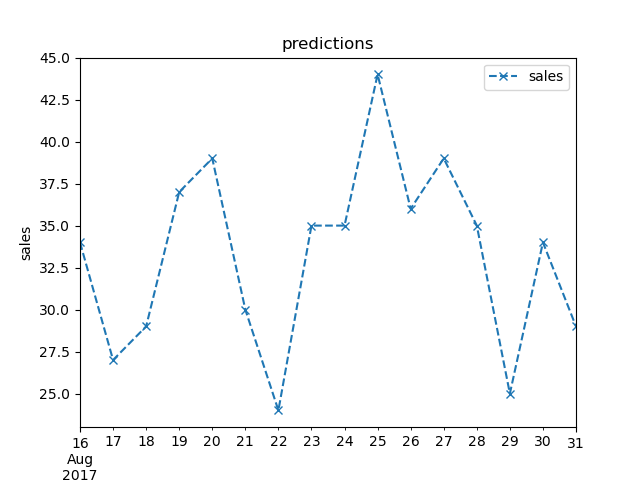

In [75]:
# plot predictions
df_pred.plot(title='predictions',ylabel='sales',style=['x--'])